<a href="https://colab.research.google.com/github/kavy9/Numpy-and-pandas-prac/blob/main/Sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
import glob 

In [ ]:
path = "/content/"

In [ ]:
files = glob.glob(path+'*.csv')

In [ ]:
all_file=[]

In [ ]:
files

['/content/Sales_August_2019.csv',
 '/content/Sales_April_2019.csv',
 '/content/Sales_May_2019.csv',
 '/content/Sales_January_2019.csv',
 '/content/Sales_November_2019.csv',
 '/content/Sales_June_2019.csv',
 '/content/Sales_March_2019.csv',
 '/content/Sales_December_2019.csv',
 '/content/Sales_February_2019.csv',
 '/content/Sales_October_2019.csv',
 '/content/Sales_July_2019.csv',
 '/content/Sales_September_2019.csv']

In [ ]:
for file_ in files:
  df=pd.read_csv(file_)
  all_file.append(df)
data=pd.concat(all_file)

In [ ]:
df=data

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [ ]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [ ]:
df.rename(columns = {'Order Date':'Order_Date'}, inplace = True)

In [ ]:
df['Order_Date']=pd.to_datetime(df['Order_Date'], dayfirst=True, errors='coerce')

In [ ]:
df.set_index('Order_Date',inplace=True)

In [ ]:
df.to_csv('sales_data.csv')

In [ ]:
#df=pd.read_csv('sales_data.csv',na_values=['Order ID','NaT'])

In [ ]:
df.shape

(186305, 5)

In [ ]:
df.sort_values(by='Order_Date',inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order_Date,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001"
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016"
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150,"735 5th St, New York City, NY 10001"
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001"
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301"
...,...,...,...,...,...
2020-01-01 04:13:00,304165,AAA Batteries (4-pack),1,2.99,"825 Adams St, Portland, OR 97035"
2020-01-01 04:21:00,299125,USB-C Charging Cable,1,11.95,"754 Hickory St, New York City, NY 10001"
2020-01-01 04:54:00,305840,Bose SoundSport Headphones,1,99.99,"784 River St, San Francisco, CA 94016"


In [ ]:
df.replace('Order ID',np.nan,inplace=True)

In [4]:
df.dropna(inplace=True)

In [ ]:
df['Order ID']=pd.to_numeric(df['Order ID'])
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])
df['Price Each']=pd.to_numeric(df['Price Each'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185950 entries, 2019-01-01 03:07:00 to 2020-01-01 05:13:00
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Purchase Address  185950 non-null  object 
 5   Total_Price       185950 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 14.9+ MB


In [ ]:
df.to_csv('sales_data.csv')

In [2]:
##drshbrdyutdu
df=pd.read_csv('sales_data.csv')

In [3]:
df['Order_Date']=pd.to_datetime(df['Order_Date'], dayfirst=True, errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124658 entries, 0 to 124657
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_Date        124658 non-null  datetime64[ns]
 1   Order ID          124658 non-null  float64       
 2   Product           124658 non-null  object        
 3   Quantity Ordered  124658 non-null  float64       
 4   Price Each        124658 non-null  float64       
 5   Purchase Address  124658 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 6.7+ MB


In [ ]:
df['Total_Price']=df['Quantity Ordered']*df['Price Each']

In [ ]:
df.set_index('Order_Date',inplace=True)

In [ ]:
GB=df.groupby(df.index.month).sum()

In [ ]:
GB['month']=GB.index

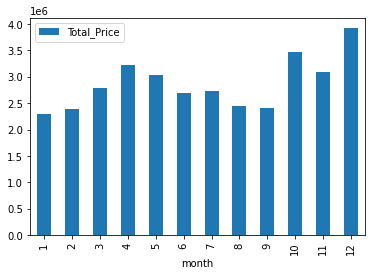

In [ ]:
GB.plot('month','Total_Price',kind='bar')

In [ ]:
GB[GB['month']==12]

,Order ID,Quantity Ordered,Price Each,Total_Price,month
Order_Date,,,,,
12,6164049078,24441,3.902768e+06,3.925407e+06,12


In [ ]:
df['city']=df['Purchase Address'].str.split(',',expand=True)[1]

In [ ]:
df

,Order_Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,city
0,2019-01-01 03:07:00,147268,Wired Headphones,1.0,11.99,"9 Lake St, New York City, NY 10001",New York City
1,2019-01-01 03:40:00,148041,USB-C Charging Cable,1.0,11.95,"760 Church St, San Francisco, CA 94016",San Francisco
2,2019-01-01 04:56:00,149343,Apple Airpods Headphones,1.0,150.00,"735 5th St, New York City, NY 10001",New York City
3,2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1.0,2.99,"75 Jackson St, Dallas, TX 75001",Dallas
4,2019-01-01 06:03:00,149350,USB-C Charging Cable,2.0,11.95,"943 2nd St, Atlanta, GA 30301",Atlanta
...,...,...,...,...,...,...,...
147310,2019-10-31 13:21:00,263008,ThinkPad Laptop,1.0,999.99,"263 Maple St, New York City, NY 10001",New York City
147311,2019-10-31 13:23:00,277253,27in 4K Gaming Monitor,1.0,389.99,"991 Pine St, Dallas, TX 75001",Dallas
147312,2019-10-31 13:23:00,271754,Apple Airpods Headphones,1.0,150.00,"569 Ridge St, Los Angeles, CA 90001",Los Angeles
147313,2019-10-31 13:26:00,272862,USB-C Charging Cable,1.0,11.95,"42 9th St, San Francisco, CA 94016",San Francisco


In [ ]:
df.dropna(inplace=True)

In [ ]:
GB2=df.groupby('city').sum().reset_index()

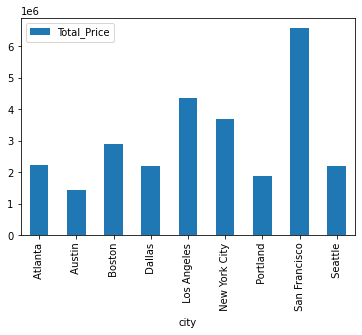

In [ ]:
GB2.plot('city','Total_Price',kind='bar')

In [ ]:
len(df.city.unique())

9

In [ ]:
GB3=df.groupby(df.index.hour).count()

In [ ]:
GB3.reset_index()

,Order_Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Total_Price
0,0,3910,3910,3910,3910,3910,3910
1,1,2350,2350,2350,2350,2350,2350
2,2,1243,1243,1243,1243,1243,1243
3,3,831,831,831,831,831,831
4,4,854,854,854,854,854,854
5,5,1321,1321,1321,1321,1321,1321
6,6,2482,2482,2482,2482,2482,2482
7,7,4011,4011,4011,4011,4011,4011
8,8,6256,6256,6256,6256,6256,6256
9,9,8748,8748,8748,8748,8748,8748


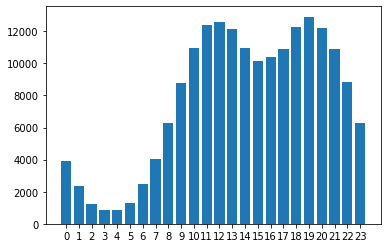

In [ ]:
plt.bar(GB3.index,GB3.Total_Price)
plt.xticks(GB3.index)
plt.show()

In [ ]:
#which two products area sold together most 

In [8]:
DF=pd.merge(df,df,left_on='Order ID',right_on='Order ID')

In [10]:
df.shape

(124658, 6)

In [9]:
DF.shape

(135250, 11)

In [11]:
DF=DF[DF['Product_x']!=DF['Product_y']]

In [12]:
DF.shape

(10204, 11)

In [14]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10204 entries, 12 to 135245
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order_Date_x        10204 non-null  datetime64[ns]
 1   Order ID            10204 non-null  float64       
 2   Product_x           10204 non-null  object        
 3   Quantity Ordered_x  10204 non-null  float64       
 4   Price Each_x        10204 non-null  float64       
 5   Purchase Address_x  10204 non-null  object        
 6   Order_Date_y        10204 non-null  datetime64[ns]
 7   Product_y           10204 non-null  object        
 8   Quantity Ordered_y  10204 non-null  float64       
 9   Price Each_y        10204 non-null  float64       
 10  Purchase Address_y  10204 non-null  object        
dtypes: datetime64[ns](2), float64(5), object(4)
memory usage: 956.6+ KB


In [17]:
GB5=DF.groupby(['Product_x','Product_y'])['Order ID'].count()

In [21]:
GB5=pd.DataFrame(GB5)

In [29]:
GB5.index[:][0]

('20in Monitor', '27in 4K Gaming Monitor')

In [50]:
type(GB5.index)

pandas.core.indexes.multi.MultiIndex

In [33]:
index=GB5.index

In [34]:
index.shape

(316,)

In [42]:
index=np.array(index)

In [51]:
p1=[item[0] for item in index]
p2=[item[1] for item in index]

In [56]:
GB5['p1']=p1
GB5['p2']=p2

In [57]:
GB5

Order ID  ...                      p2
Product_x    Product_y                         ...                        
20in Monitor 27in 4K Gaming Monitor         1  ...  27in 4K Gaming Monitor
             27in FHD Monitor               3  ...        27in FHD Monitor
             34in Ultrawide Monitor         1  ...  34in Ultrawide Monitor
             AA Batteries (4-pack)         10  ...   AA Batteries (4-pack)
             AAA Batteries (4-pack)         7  ...  AAA Batteries (4-pack)
...                                       ...  ...                     ...
iPhone       Macbook Pro Laptop             3  ...      Macbook Pro Laptop
             ThinkPad Laptop                4  ...         ThinkPad Laptop
             USB-C Charging Cable          20  ...    USB-C Charging Cable
             Vareebadd Phone                7  ...         Vareebadd Phone
             Wired Headphones             312  ...        Wired Headphones

[316 rows x 3 columns]

In [59]:
GB5[GB5.p1!=GB5.p2]

Order ID  ...                      p2
Product_x    Product_y                         ...                        
20in Monitor 27in 4K Gaming Monitor         1  ...  27in 4K Gaming Monitor
             27in FHD Monitor               3  ...        27in FHD Monitor
             34in Ultrawide Monitor         1  ...  34in Ultrawide Monitor
             AA Batteries (4-pack)         10  ...   AA Batteries (4-pack)
             AAA Batteries (4-pack)         7  ...  AAA Batteries (4-pack)
...                                       ...  ...                     ...
iPhone       Macbook Pro Laptop             3  ...      Macbook Pro Laptop
             ThinkPad Laptop                4  ...         ThinkPad Laptop
             USB-C Charging Cable          20  ...    USB-C Charging Cable
             Vareebadd Phone                7  ...         Vareebadd Phone
             Wired Headphones             312  ...        Wired Headphones

[316 rows x 3 columns]

In [64]:
GB5['Order ID'].nlargest(10)

Product_x                 Product_y               
Google Phone              USB-C Charging Cable        712
USB-C Charging Cable      Google Phone                712
Lightning Charging Cable  iPhone                      696
iPhone                    Lightning Charging Cable    696
Wired Headphones          iPhone                      312
iPhone                    Wired Headphones            312
Google Phone              Wired Headphones            287
Wired Headphones          Google Phone                287
Apple Airpods Headphones  iPhone                      248
iPhone                    Apple Airpods Headphones    248
Name: Order ID, dtype: int64

In [77]:
dup=df[df['Order ID'].duplicated(keep=False)]

In [66]:
dup.head(10)

,Order_Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
11,2019-01-01 07:29:00,144804.0,Wired Headphones,1.0,11.99,"628 Lake St, New York City, NY 10001"
12,2019-01-01 07:29:00,144804.0,iPhone,1.0,700.00,"628 Lake St, New York City, NY 10001"
65,2019-01-01 11:25:00,148074.0,USB-C Charging Cable,1.0,11.95,"6 Johnson St, Atlanta, GA 30301"
66,2019-01-01 11:25:00,148074.0,Google Phone,1.0,600.00,"6 Johnson St, Atlanta, GA 30301"
79,2019-01-01 12:02:00,148450.0,iPhone,1.0,700.00,"761 Lakeview St, Dallas, TX 75001"
80,2019-01-01 12:02:00,148450.0,Lightning Charging Cable,1.0,14.95,"761 Lakeview St, Dallas, TX 75001"
92,2019-01-01 12:51:00,144679.0,Google Phone,1.0,600.00,"984 Lakeview St, San Francisco, CA 94016"
93,2019-01-01 12:51:00,144679.0,USB-C Charging Cable,1.0,11.95,"984 Lakeview St, San Francisco, CA 94016"
94,2019-01-01 12:57:00,147451.0,Wired Headphones,1.0,11.99,"229 Elm St, New York City, NY 10001"
95,2019-01-01 12:57:00,147451.0,Google Phone,1.0,600.00,"229 Elm St, New York City, NY 10001"


In [78]:
dup['grouped']=dup.groupby(dup['Order ID'])['Product'].transform(lambda x : ','.join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
dup

,Order_Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,grouped
11,2019-01-01 07:29:00,144804.0,Wired Headphones,1.0,11.99,"628 Lake St, New York City, NY 10001","Wired Headphones,iPhone"
12,2019-01-01 07:29:00,144804.0,iPhone,1.0,700.00,"628 Lake St, New York City, NY 10001","Wired Headphones,iPhone"
65,2019-01-01 11:25:00,148074.0,USB-C Charging Cable,1.0,11.95,"6 Johnson St, Atlanta, GA 30301","USB-C Charging Cable,Google Phone"
66,2019-01-01 11:25:00,148074.0,Google Phone,1.0,600.00,"6 Johnson St, Atlanta, GA 30301","USB-C Charging Cable,Google Phone"
79,2019-01-01 12:02:00,148450.0,iPhone,1.0,700.00,"761 Lakeview St, Dallas, TX 75001","iPhone,Lightning Charging Cable"
...,...,...,...,...,...,...,...
124547,2019-09-19 16:05:00,253415.0,Lightning Charging Cable,1.0,14.95,"833 Chestnut St, Los Angeles, CA 90001","iPhone,Lightning Charging Cable"
124550,2019-09-19 16:09:00,249390.0,AA Batteries (4-pack),1.0,3.84,"412 Jefferson St, San Francisco, CA 94016","AA Batteries (4-pack),Lightning Charging Cable"
124552,2019-09-19 16:09:00,249390.0,Lightning Charging Cable,1.0,14.95,"412 Jefferson St, San Francisco, CA 94016","AA Batteries (4-pack),Lightning Charging Cable"
124653,2019-09-19 20:36:00,254686.0,27in FHD Monitor,1.0,149.99,"285 Elm St, New York City, NY 10001","27in FHD Monitor,Lightning Charging Cable"


In [71]:
grouped.groupby(by='Product')['Product'].count().nlargest(5)

Product
Lightning Charging Cable,iPhone      630
Google Phone,USB-C Charging Cable    624
USB-C Charging Cable,Google Phone    606
iPhone,Lightning Charging Cable      606
Wired Headphones,iPhone              290
Name: Product, dtype: int64

In [79]:
dup=dup[['Order ID','grouped']].drop_duplicates()

In [80]:
dup.head()

,Order ID,grouped
11,144804.0,"Wired Headphones,iPhone"
65,148074.0,"USB-C Charging Cable,Google Phone"
79,148450.0,"iPhone,Lightning Charging Cable"
92,144679.0,"Google Phone,USB-C Charging Cable"
94,147451.0,"Wired Headphones,Google Phone"


In [88]:
 from itertools import combinations
 from collections import Counter
 count=Counter() 
 list_=[1,2,3,4,5,5,5,5,5]
 #print(list(combinations(list_,2)))

count.update(list_)
Counter(list_)

Counter({1: 1, 2: 1, 3: 1, 4: 1, 5: 5})

In [90]:
count=Counter()
for row in dup['grouped']:
  row_list=row.split(',')
  count.update(Counter(combinations(row_list,2)))
count.most_common(5)

[(('Google Phone', 'USB-C Charging Cable'), 359),
 (('USB-C Charging Cable', 'Google Phone'), 353),
 (('Lightning Charging Cable', 'iPhone'), 351),
 (('iPhone', 'Lightning Charging Cable'), 345),
 (('Wired Headphones', 'iPhone'), 169)]

In [91]:
#what product sold the most 

In [92]:
df

,Order_Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
0,2019-01-01 03:07:00,147268.0,Wired Headphones,1.0,11.99,"9 Lake St, New York City, NY 10001"
1,2019-01-01 03:40:00,148041.0,USB-C Charging Cable,1.0,11.95,"760 Church St, San Francisco, CA 94016"
2,2019-01-01 04:56:00,149343.0,Apple Airpods Headphones,1.0,150.00,"735 5th St, New York City, NY 10001"
3,2019-01-01 05:53:00,149964.0,AAA Batteries (4-pack),1.0,2.99,"75 Jackson St, Dallas, TX 75001"
4,2019-01-01 06:03:00,149350.0,USB-C Charging Cable,2.0,11.95,"943 2nd St, Atlanta, GA 30301"
...,...,...,...,...,...,...
124653,2019-09-19 20:36:00,254686.0,27in FHD Monitor,1.0,149.99,"285 Elm St, New York City, NY 10001"
124654,2019-09-19 20:36:00,254686.0,Lightning Charging Cable,1.0,14.95,"285 Elm St, New York City, NY 10001"
124655,2019-09-19 20:42:00,251793.0,AA Batteries (4-pack),1.0,3.84,"507 Lakeview St, Seattle, WA 98101"
124656,2019-09-19 20:43:00,249048.0,Wired Headphones,1.0,11.99,"725 River St, New York City, NY 10001"


In [96]:
df.groupby(by='Product')['Quantity Ordered'].sum().nlargest(5)

Product
AAA Batteries (4-pack)      20780.0
AA Batteries (4-pack)       18497.0
USB-C Charging Cable        15954.0
Lightning Charging Cable    15572.0
Wired Headphones            13761.0
Name: Quantity Ordered, dtype: float64